# Exploratory Data Analysis Palmer Penguins
<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=500>

Done by: Carlos M Mazzaroli

Data comes from:

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv

## About the data

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://pallter.marine.rutgers.edu/).

## Atributes:

Numeric

1. **species:** the penguin species (Adelie, Chinstrap or Gento)

1. **island:**  isla en la Antártida donde se observó cada pingüino (Biscoe, Torgersen or Dream)

1. **bill_length_mm:** bill length measurement in millimeters

1. **bill_depth_mm:** bill depth measurement in millimeters

1. **flipper_length_mm:** flipper length measurement in millimeters

1. **body_mass_g:** penguin body weight measurement

1. **sex:**  (female or male)  

1. **year:** year of study

## Initial configuration





install libraries

In [1]:
!pip install --upgrade pip
!pip install numpy pandas matplotlib seaborn empiricaldist statsmodels sklearn pyjanitor

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import empiricaldist
import janitor

### Graphs appareance

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

# Seaborn
penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
    'Torgersen': '#955FC8', 
    'Biscoe': '#94e2c3', 
    'Dream': '#345469',
    'Female': 'pink',
    'Male': 'skyblue',
}

# Matplotlib
pcolors =['#ff6602ff','#0f7175ff','#c65dc9ff']
icolors =['#955FC8', '#94e2c3', '#345469']
scolors =['pink','skyblue',]

plt_colors=[pcolors,icolors,scolors]

## Data validation

### Load dataset

In [4]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Variables from the dataset

1. **species:** (Categorical)
1. **island:** (Categorical)
1. **bill_length_mm:** (Numerical)
1. **bill_depth_mm:** (Numerical)
1. **flipper_length_mm:** (Numerical)
1. **body_mass_g:** (Numerical)
1. **sex:** (Categorical)
1. **year:** (Numerical)

- **Numerical data**: 4
- **Categorical data**: 3

Shape of the dataset: 

- rows: 344
- cols: 7

In [6]:
category_columns = ['species','island','sex']
numeric_columns = df.select_dtypes(include=np.number).columns
penguin_columns = ['Adelie', 'Chinstrap', 'Gentoo' ]

#### Data Cleaning

Not missing values

In [7]:
df.notnull().sum()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

Missing values

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Proportion of missing values

In [9]:
df.isnull().sum()/df.notnull().sum()

species              0.000000
island               0.000000
bill_length_mm       0.005848
bill_depth_mm        0.005848
flipper_length_mm    0.005848
body_mass_g          0.005848
sex                  0.033033
dtype: float64

Missing values

In [10]:
sex_null = df.isnull().any(True)
sex_null
df[sex_null]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


##### **Observation:**
 The missing values come mainly from the gender variable, except for two penguins that are missing all of their numeric and gender variables. A new data frame will be created with the null values removed to continue the study and then the null values will be retaken.

In [11]:
df2 = df.dropna()
print(f'''
{df2.isna().any()}
''')


species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool



#### Convert data type

In [12]:
df = df.astype({'species': 'category','island': 'category','sex': 'category',}) 
df2 = df2.astype({'species': 'category','island': 'category','sex': 'category',}) 


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


# Data exploration

# Univariate Analysis

## Descriptive Statistics

### Numerical analysis

See the basic statistics from the numerical Data

In [14]:
numerical_statistics = pd.concat([
    df2.describe(include=np.number).iloc[0:1],
    df2.mode(numeric_only=True).rename(index={0:'mode'}),
    pd.DataFrame(df2.median(numeric_only=True),columns=['median']).T,
    df2.describe(include=np.number).iloc[1:8],
    ])
numerical_statistics

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mode,41.100000,17.000000,190.000000,3800.000000
median,44.500000,17.300000,197.000000,4050.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Numerical statistics visualization

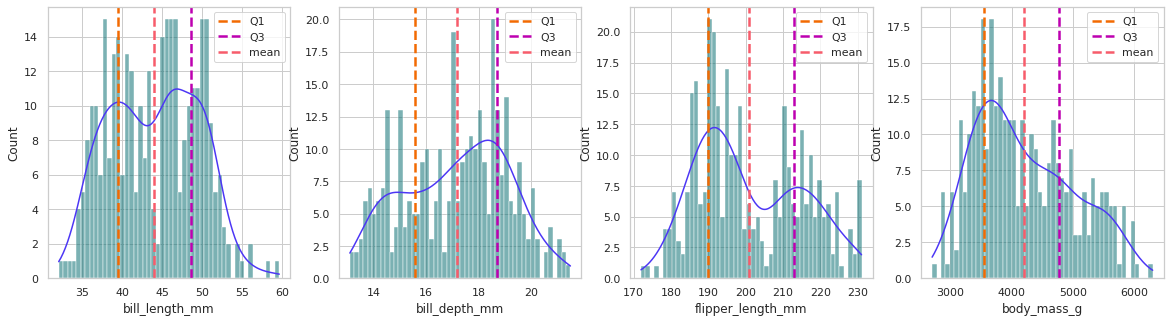

In [15]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
for i,col in enumerate(numerical_statistics):
    sns.histplot( 
        ax=ax[i],
        data=df2,
        x=col,
        palette=penguin_color,
        bins=50,
        alpha=.55,
        color='#0f7175ff',
        kde=True,
        )
    ax[i].lines[0].set_color('#4c36f5')

    ax[i].axvline(
        x=numerical_statistics.iloc[:,i:i+1].loc['25%'][0],
        color='#f26a02',
        linestyle='dashed',
        linewidth=2.5,
        label='Q1'
    ) 
    ax[i].axvline(
        x=numerical_statistics.iloc[:,i:i+1].loc['75%'][0],
        color='#bd00b0',
        linestyle='dashed',
        linewidth=2.5,
        label='Q3'
    )
    ax[i].axvline(
        x=numerical_statistics.iloc[:,i:i+1].loc['mean'][0],
        color='#f75c6b',
        linestyle='dashed',
        linewidth=2.5,
        label='mean',
    )
    ax[i].legend()


	

#### Partial conclutions

From the graphs, we can conclude:
- The variables **bill_length_mm, bill_ depth_m, flipper_length_mm** tend to be a bimodal distribution.
- As for the variable body_mass_g, it tends to be a positively Skewed Distribution.

### Categorical analysis

See the basic statistics from the categorical data

In [16]:
df2.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


#### Categorical variables count visualization

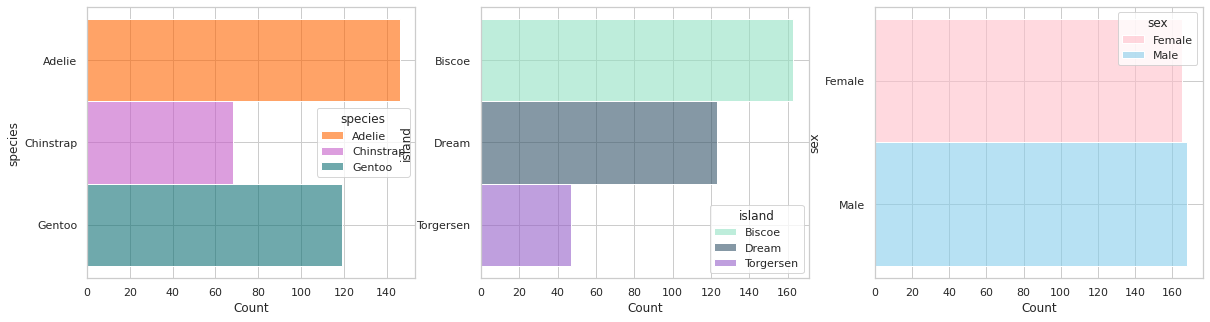

In [17]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i,category in enumerate(category_columns):
    sns.histplot(
        ax=ax[i], 
        data=df2,
        y=category,
        hue=category,
        palette=penguin_color,
        alpha=0.6
    )
    

$
\begin{matrix}
\text{SPECIES}   & count &&&&  & \text{ISLAND} & count &&&& \text{SEX}  & count\\
Adelie           & 146   &&&&  & Biscoe        & 163   &&&& Male        & 168  \\
Gentoo           & 119   &&&&  & Dream         & 123   &&&& Female      & 165  \\
Chinstrap        & 68    &&&&  & Torgersen     & 47    &&&&                    \\
\end{matrix}
$

- In the previous graph, it is seen that the data of the species and the islands are not balanced, except for the sex of the penguins, which is balanced.


#### Categorical variables proportion visualization

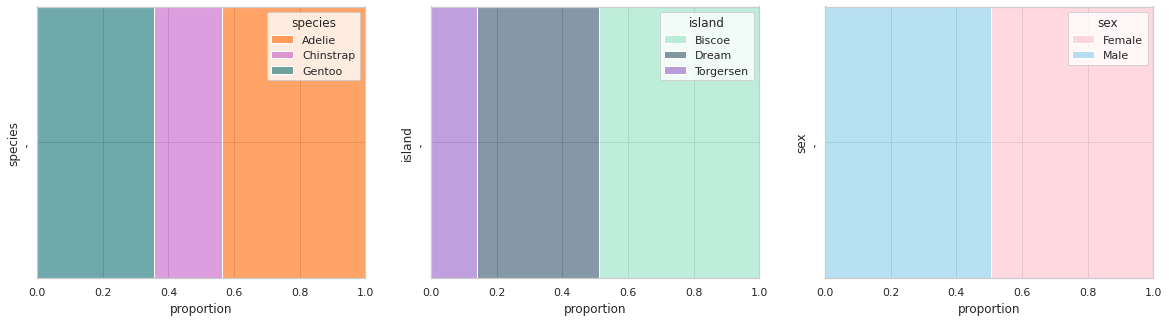

In [18]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i,category in enumerate(category_columns):
    sns.histplot(
        ax=ax[i],
        data=df2.add_column(category[i],',').reset_index(),
        y=category[i],
        palette=penguin_color,
        multiple='fill',
        stat='count',
        hue=category,
        alpha=0.6
    )
    ax[i].set(ylabel=category, xlabel='proportion')

    


$
\begin{matrix}
\text{SPECIES}   & proportion  &&&&  & \text{ISLAND} & proportion &&&& \text{SEX}  & proportion\\
Adelie           & 43.84\%     &&&&  & Biscoe        & 48.94\%    &&&& Male        & 50.45\%     \\
Gentoo           & 35.73\%     &&&&  & Dream         & 36.93\%    &&&& Female      & 49.54\%     \\
Chinstrap        & 20.42\%     &&&&  & Torgersen     & 14.11\%    &&&& 
\end{matrix}
$



The proportion of penguins between the Adelie and Gentoo species is similar, however there is a smaller number of Chinstraps

The same situation occurs with the islands, where we have the highest concentration of penguins on Biscoe Island, followed by Dream and Torsergen with the fewest records.

#### Partial Conclusions

From the previous calculus several things can be concluded:

- The proportion of species and islands is similar.
- More than 40% of the penguins are of the Adelie species.
- Nearly 50% of the penguins inhabit Biscoe Island.

### Numerical & Categorical analysis

Prepare filters for analysis

In [44]:
male = df2.sex == 'Male'
female = ~male

adelie = df2.species == 'Adelie'
chinstrap = df2.species == 'Chinstrap'
gentoo = df2.species == 'Gentoo'

torgersen = df2.island == 'Torgersen'
dream = df2.island == 'Dream'
biscoe = df2.island == 'Biscoe'

species = [adelie,chinstrap,gentoo]
islands = [torgersen,dream,biscoe]
sex = [male, female]

#### Basic statistics of numerical variables by species

In [52]:
df2.groupby(['species','island']).agg(['min','mean','max']).dropna()

bill_length_mm                  bill_depth_mm             \
                               min       mean   max           min       mean   
species   island                                                               
Adelie    Biscoe              34.5  38.975000  45.6          16.0  18.370455   
          Dream               32.1  38.520000  44.1          15.5  18.240000   
          Torgersen           33.5  39.038298  46.0          15.9  18.451064   
Chinstrap Dream               40.9  48.833824  58.0          16.4  18.420588   
Gentoo    Biscoe              40.9  47.568067  59.6          13.1  14.996639   

                          flipper_length_mm                    body_mass_g  \
                      max               min        mean    max         min   
species   island                                                             
Adelie    Biscoe     21.1             172.0  188.795455  203.0      2850.0   
          Dream      21.2             178.0  189.927273  208.0      2900.0   
          Torgersen  21.5             176.0  191.531915  210.0      2900.0   
Chinstrap Dream      20.8             178.0  195.823529  212.0      2700.0   
Gentoo    Biscoe     17.3             203.0  217.235294  231.0      3950.0   

                                          
                            mean     max  
species   island                          
Adelie    Biscoe     3709.659091  4775.0  
          Dream      3701.363636  4650.0  
          Torgersen  3708.510638  4700.0  
Chinstrap Dream      3733.088235  4800.0  
Gentoo    Biscoe     5092.436975  6300.0


- Pinguinos Adelie 
    - Estan presentes en las tres islas.
    - Destacan por ser mas pequenos que los Chinstrap y Gentoo menos por el ancho de su pico que es similar al del Chinstrap
    - Sus alas y pico tanto largo como ancho tiende a ser mas grande en la isla Torgersen que su misma especie
    - Tienden a ser mas pesados en la isla Biscoe.


- Chinstrap
    - Solo se encuentra en la isla Dream.
    - El largo de ala y peso es superior al de los pinguinos Adelie, pero inferior que los Gentoo.
    - El largo de su pico es similar al del Adelie, pero es mas ancho que el Gentoo

- Gentoo
    - Solo se encuentran en la isla Biscoe.
    - Son los mas pesados por diferencia entre las otras especies
    - Tienen las alas mas largas entre las especies
    - Tienen el pico mas largo, pero el mas angosto al mismo tiempo

#### Visualization of numerical variables by categorical variables

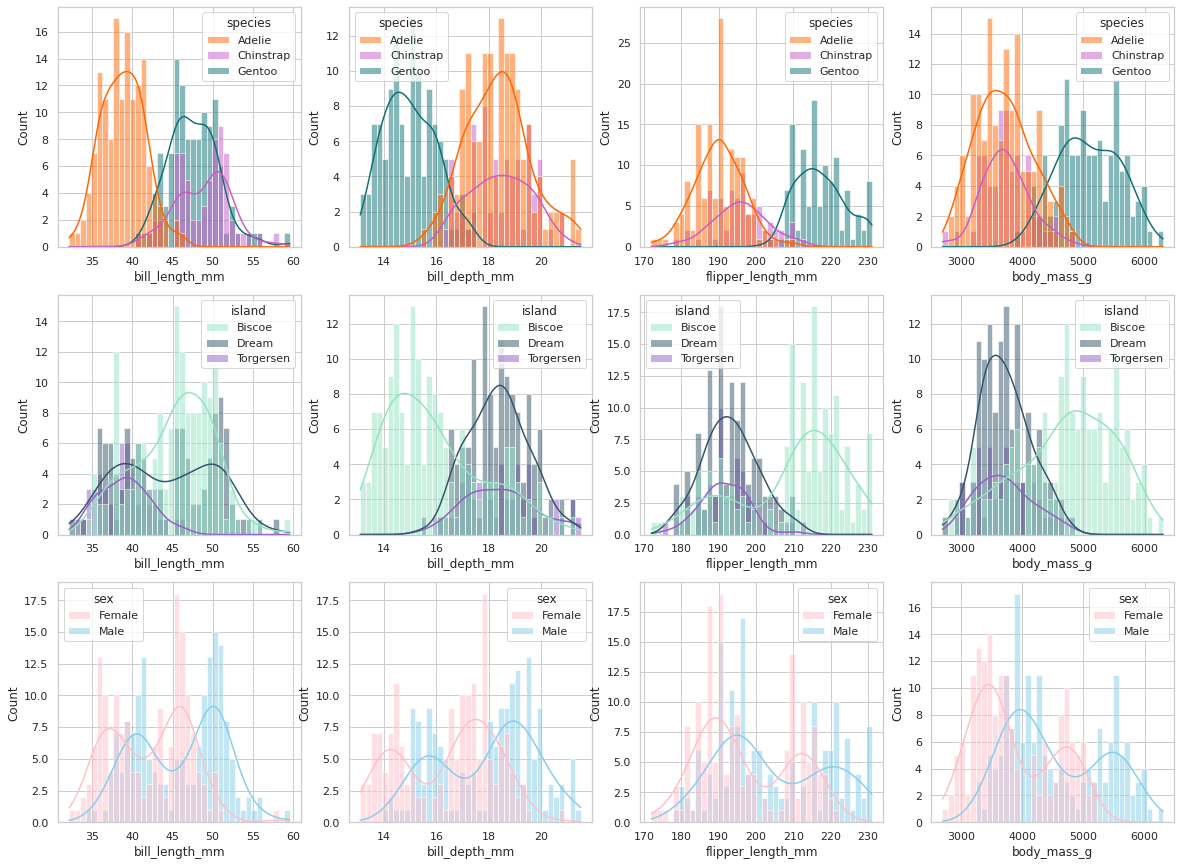

In [20]:
fig,ax = plt.subplots(3,len(numeric_columns), figsize=(20,15))

for i, i_col in enumerate(category_columns):
    for j, j_col in enumerate(numeric_columns):
        sns.histplot( 
            ax=ax[i][j],
            data=df2,
            x=j_col,
            hue=i_col,
            bins=40,
            kde=True,
            palette=penguin_color,
            )

##### Partial Conclusions

With the last graph, we can conclude that:

1. The species category is the one that most closely corresponds to a normal distribution.
1. Biscoe Island has a bimodal trend.
1. Dream Island appears to follow a normal distribution except for the variable bill length, which tends to have a bimodal distribution.
1. Torgersen Island tends to have a normal distribution.
1. The sex of penguins has a bimodal tendency.

##### Data insights

- Biases in the species category may arise from the difference in values between sexes of the same species.
- Bimodal trends in the island category may be suggesting the presence of more than one penguin per island.
- Bimodal tendencies in sex are due to different species.


#### Visualization of numerical variables by species

##### Adelie species

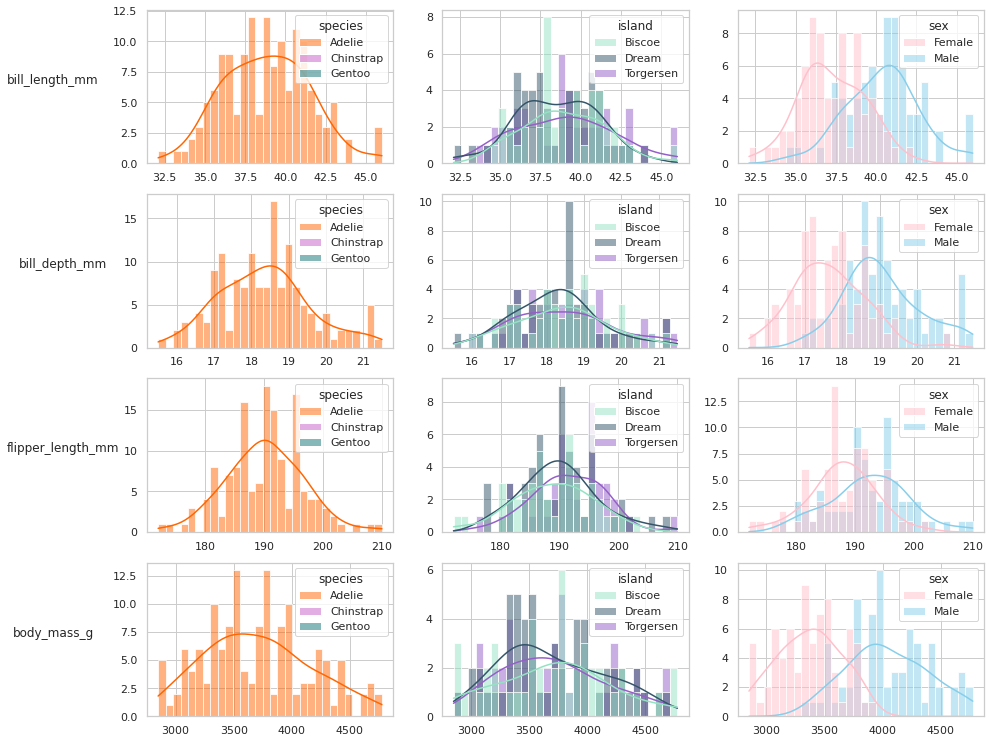

In [22]:
fig,ax = plt.subplots(len(numeric_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numeric_columns):
    for j, j_col in enumerate(category_columns): 
        sns.histplot( 
            ax=ax[i][j],
            data=df2[adelie],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )
            
        ax[i][j].set_ylabel(numeric_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

##### Chinstrap species

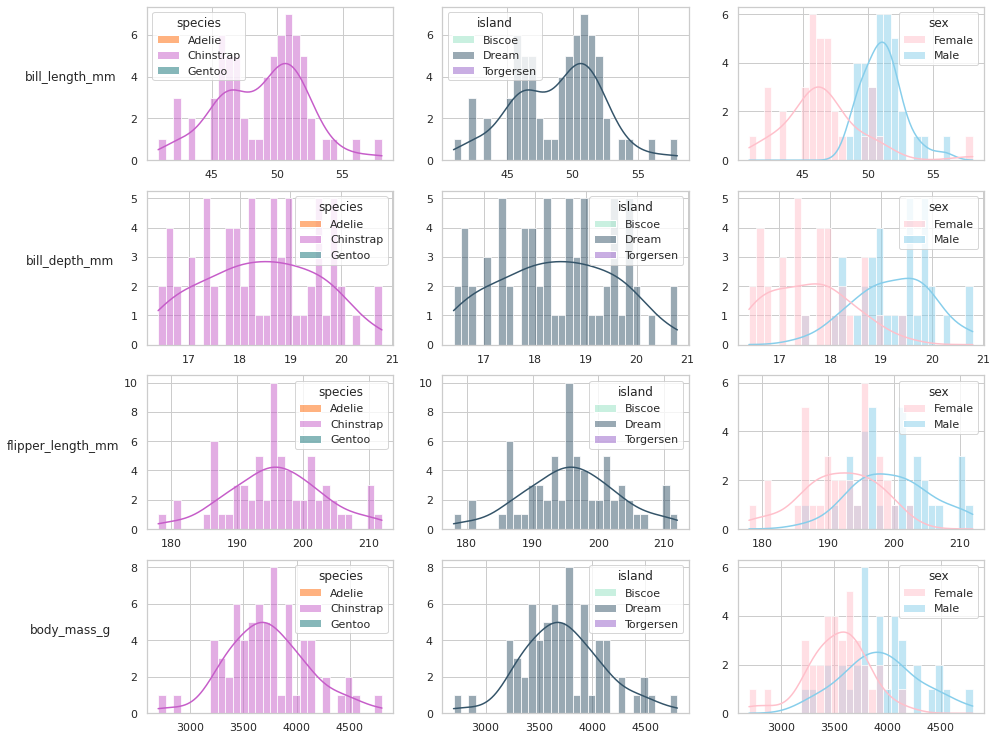

In [23]:
fig,ax = plt.subplots(len(numeric_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numeric_columns):
    for j, j_col in enumerate(category_columns): 
        sns.histplot( 
            ax=ax[i][j],
            data=df2[chinstrap],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )
            
        ax[i][j].set_ylabel(numeric_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)
        # ax[0][j].set_title(penguin_columns[j])
        # ax[i][j].get_legend().remove()

##### Gentoo species

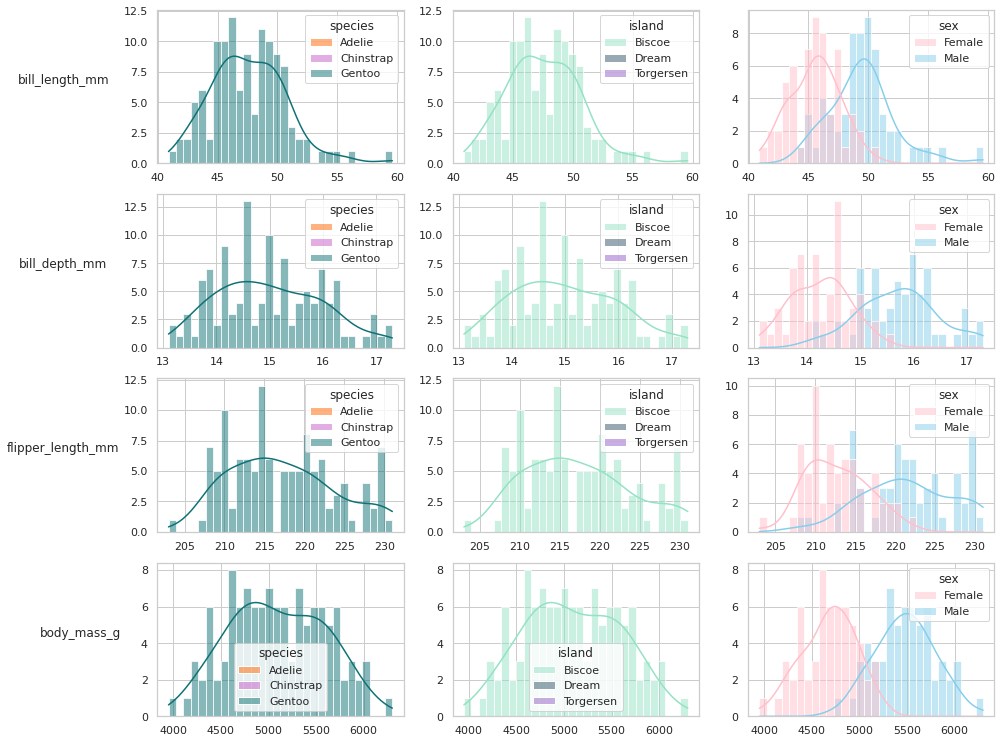

In [24]:
fig,ax = plt.subplots(len(numeric_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numeric_columns):
    for j, j_col in enumerate(category_columns): 
        sns.histplot( 
            ax=ax[i][j],
            data=df2[gentoo],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )
            
        ax[i][j].set_ylabel(numeric_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)
        # ax[0][j].set_title(penguin_columns[j])
        # ax[i][j].get_legend().remove()

##### Conclusion

- All penguins follow a normal distribution.
- In all species, males tend to be heavier than females.